In [19]:
import pandas as pd
from sklearn.utils import shuffle
import re

# Carregar os datasets
df_fake = pd.read_csv("Data/Fake.csv")
df_true = pd.read_csv("Data/True.csv")

# Adicionar rótulo: 0 = fake, 1 = true
df_fake['label'] = 0
df_true['label'] = 1

def limpar_prefixo_agencia(texto):
    return re.sub(r"^(.*?\(Reuters\)[\s\-–]*)", "", texto)

df_true['text'] = df_true['text'].apply(limpar_prefixo_agencia)

# Juntar os dados
df = pd.concat([df_fake, df_true], ignore_index=True)
df = shuffle(df).reset_index(drop=True)

# Remover textos duplicados antes da divisão
df = df.drop_duplicates(subset='text').reset_index(drop=True)

print(df.shape)
print(df['label'].value_counts())

# Verificar estrutura
df[['title', 'text', 'label']].head()

(38646, 5)
label
1    21191
0    17455
Name: count, dtype: int64


,title,text,label
0,Women march through desert for Israeli-Palesti...,Thousands of Israeli and Palestinian women tre...,1
1,NOTHING NEW: ‘Fake’ & Weaponized News Has Long...,In response to the establishment media s cont...,0
2,#Berkeley CRAZY! RIOTERS CHASE And Beat People...,Is anyone else thinking what we re thinking ab...,0
3,"28 YR OLD REFUGEE Turned European Soccer Star,...",What a hero what a guy what a crazy world we l...,0
4,EU's Juncker offers carrot and stick to easter...,European Commission chief Jean-Claude Juncker ...,1


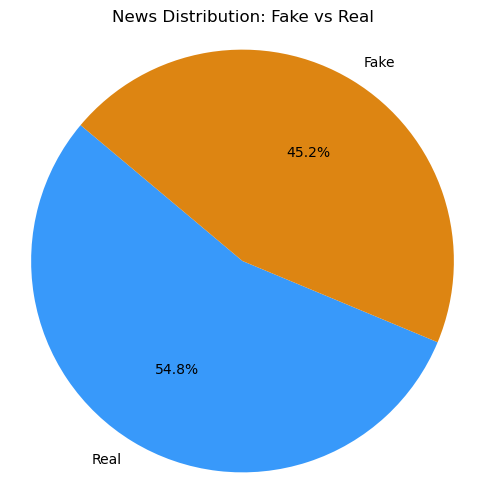

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = df['label'].value_counts()
labels = ['Real', 'Fake'] 
sizes = [counts[1], counts[0]]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=["#3899fa","#dd8512ff"])
plt.title("News Distribution: Fake vs Real")
plt.axis('equal')  
plt.show()

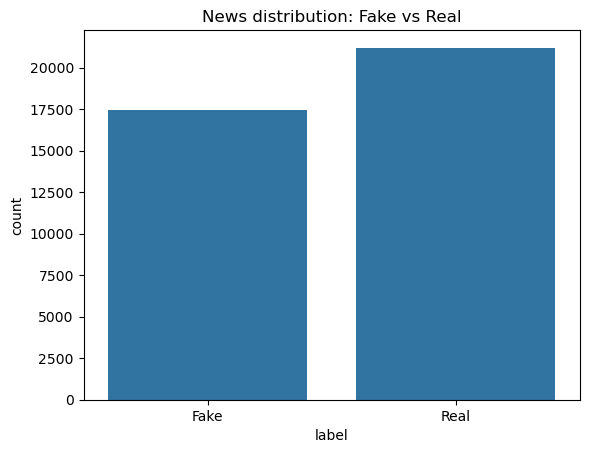

In [21]:
sns.countplot(x='label', data=df)
plt.title("News distribution: Fake vs Real")
plt.xticks([0,1], ['Fake', 'Real'])
plt.show()

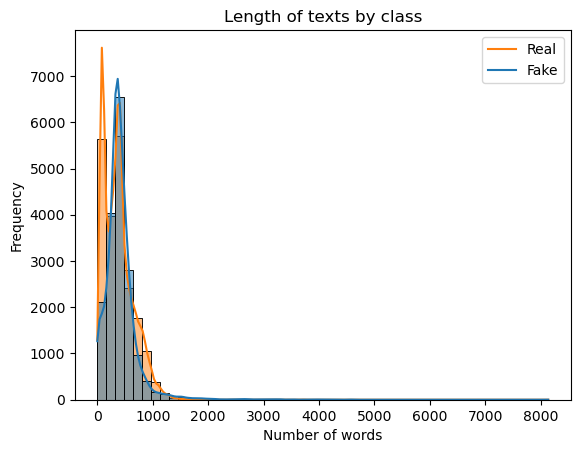

In [22]:

df['len_texto'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(data=df, x='len_texto', hue='label', bins=50, kde=True)
plt.title("Length of texts by class")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.legend(labels=["Real", "Fake"])
plt.show()

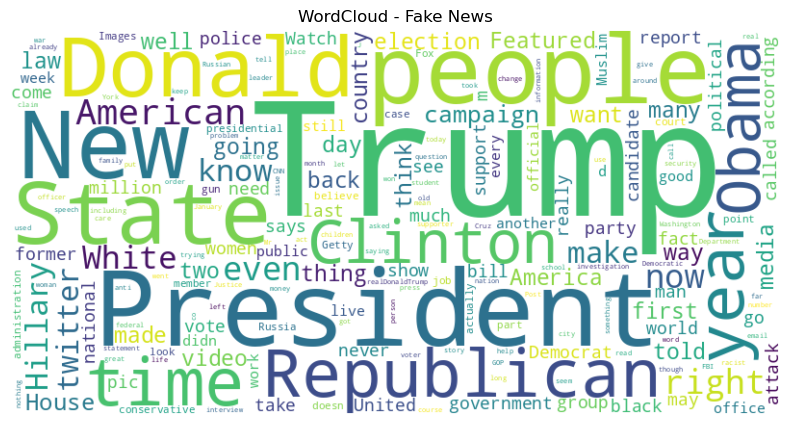

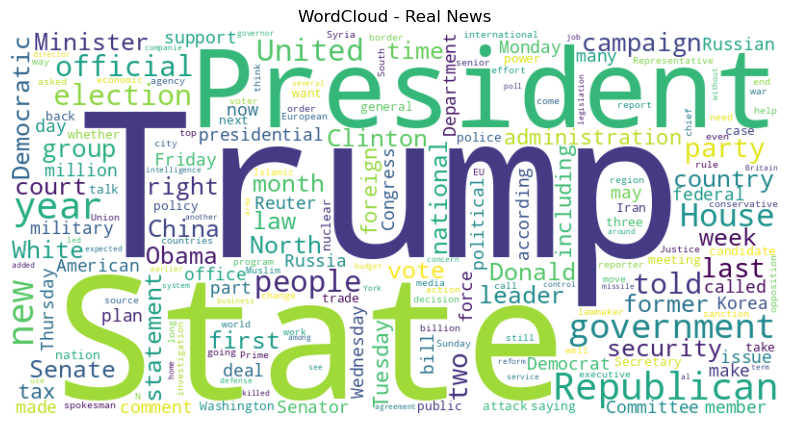

In [23]:
from wordcloud import WordCloud

def gerar_wordcloud(texto, titulo):
    wc = WordCloud(
        width=800, height=400, background_color='white',
        stopwords=stopwords_custom, collocations=False
    ).generate(texto)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

# Gerar wordcloud para notícias falsas e reais
for label in [0, 1]:
    text_all = " ".join(df[df['label'] == label]['text'].astype(str).tolist())
    gerar_wordcloud(text_all, "WordCloud - " + ("Fake News" if label == 0 else "Real News"))


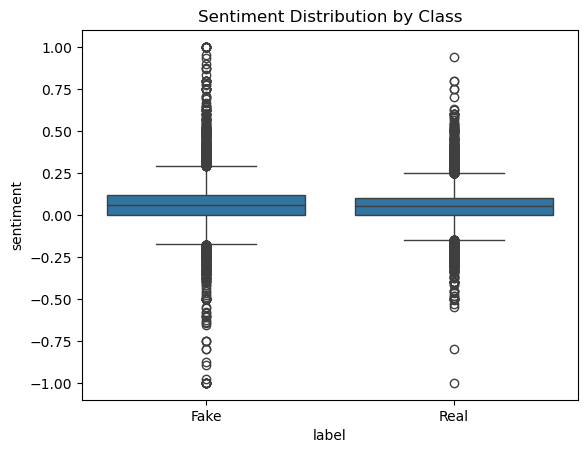

In [24]:
from textblob import TextBlob

def analisar_sentimento(texto):
    return TextBlob(str(texto)).sentiment.polarity

df['sentiment'] = df['text'].apply(analisar_sentimento)

sns.boxplot(x="label", y='sentiment', data=df)
plt.title("Sentiment Distribution by Class")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()


True com data: 21417
Fake com data: 11868


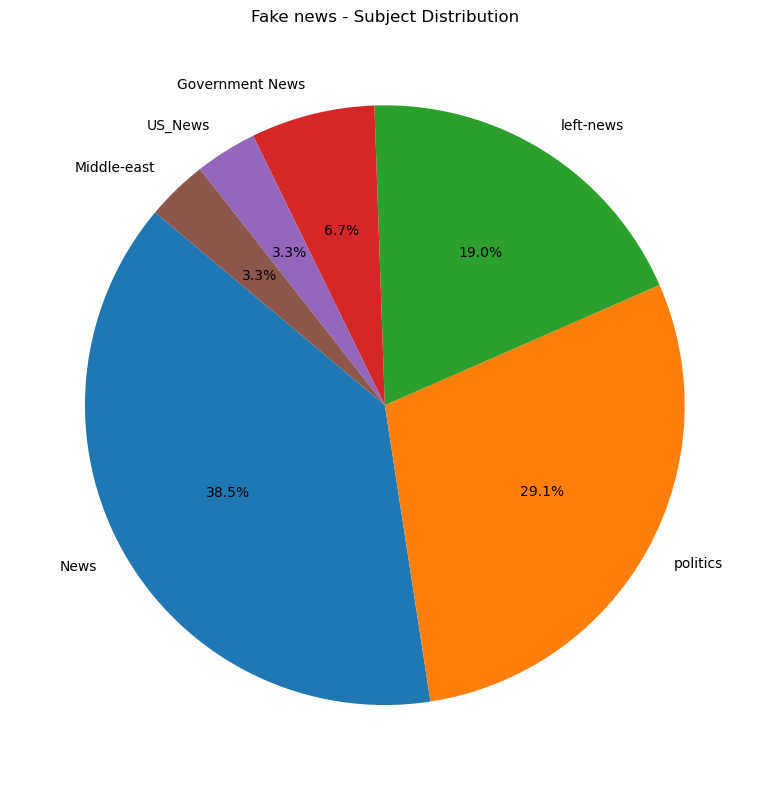

In [25]:
# Contar temas
subject_counts_fake = df_fake['subject'].value_counts()
subject_counts_true = df_true['subject'].value_counts()

# Converter a coluna 'date' amtes de juntar
df_true['date'] = pd.to_datetime(df_true['date'], errors='coerce', dayfirst=True)
df_fake['date'] = pd.to_datetime(df_fake['date'], errors='coerce', dayfirst=True)

# Verificação real
print("True com data:", df_true['date'].notna().sum())
print("Fake com data:", df_fake['date'].notna().sum())

# Combinar
df = pd.concat([df_true, df_fake], ignore_index=True)
df = df.dropna(subset=['date'])

# Gráfico circular (Fake)
plt.figure(figsize=(8, 8))
plt.pie(subject_counts_fake, labels=subject_counts_fake.index, autopct='%1.1f%%', startangle=140)
plt.title("Fake news - Subject Distribution")
plt.tight_layout()
plt.show()

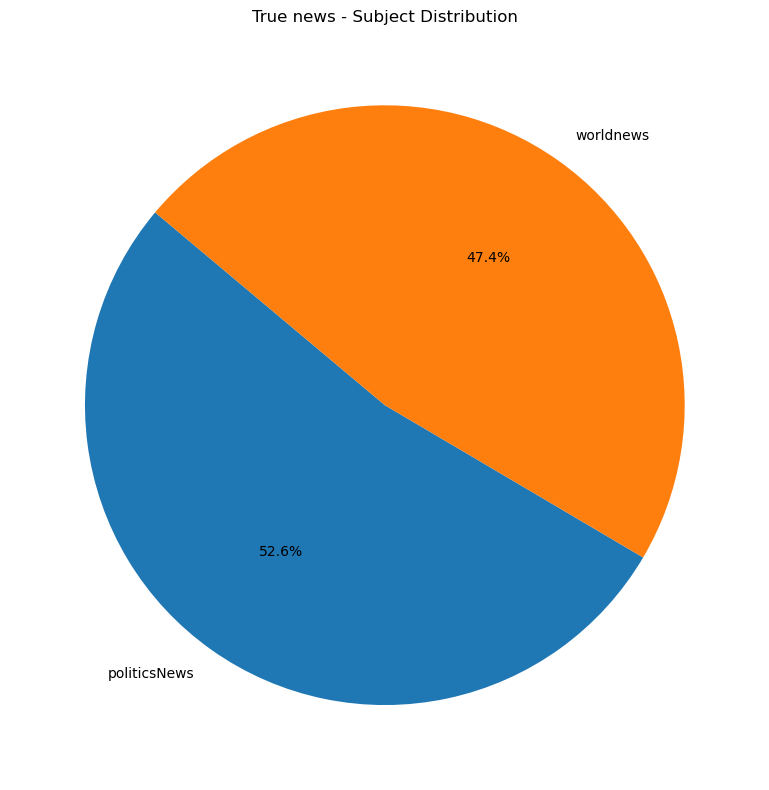

In [26]:
# Gráfico circular (True)
plt.figure(figsize=(8, 8))
plt.pie(subject_counts_true, labels=subject_counts_true.index, autopct='%1.1f%%', startangle=140)
plt.title("True news - Subject Distribution")
plt.tight_layout()
plt.show()

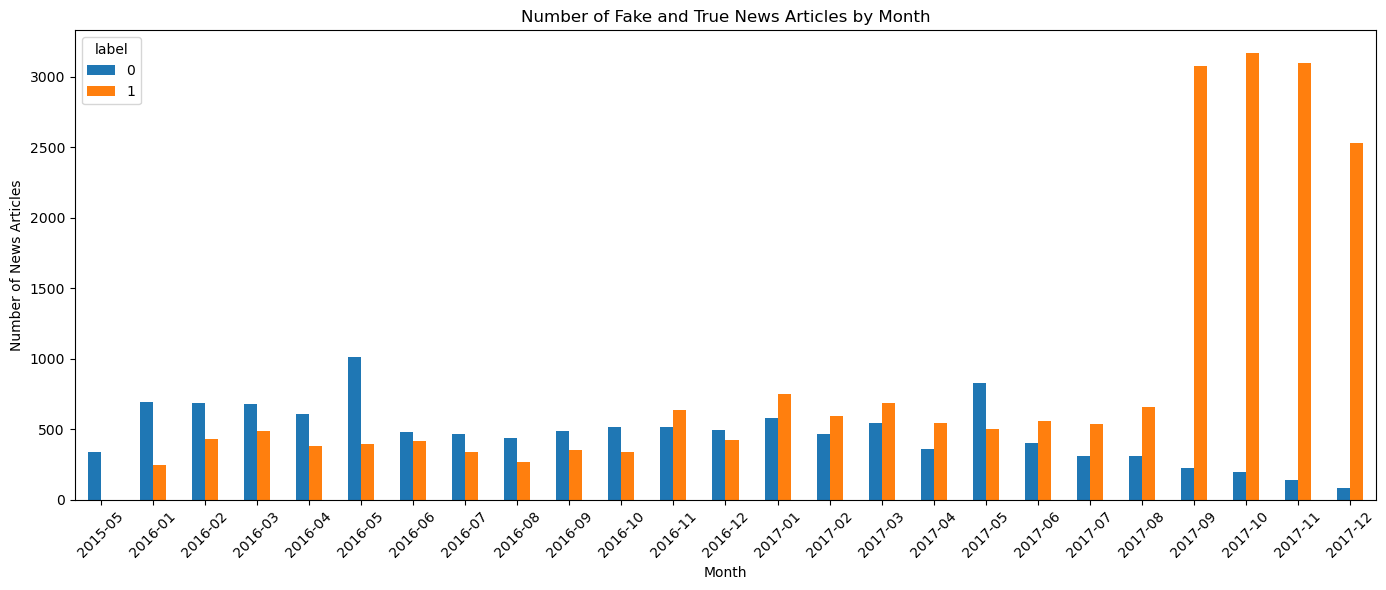

In [27]:
# Agrupar por mês
df['month'] = df['date'].dt.to_period('M')
monthly_counts_by_label = df.groupby(['month', 'label']).size().unstack(fill_value=0)

#Gráfico de barras por mês
monthly_counts_by_label.plot(kind='bar', figsize=(14, 6))
plt.title('Number of Fake and True News Articles by Month')
plt.xlabel('Month')
plt.ylabel('Number of News Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()